# 1. Imports

In [2]:
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
from datetime import datetime as dt
import ast
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random as random

import warnings
warnings.filterwarnings("ignore")

# 2. Read in dataset

In [3]:
df = pd.read_csv('checkpoint_5.csv')
df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,lease_commence_date,storey_range,block,remaining_lease_mth,...,closest_park,num_park_1km_radius,price_per_sqm,num_of_dwellings_in_town,Region,Area (km²),Population,Density (/km²),resell_date,Annual CPI
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,1979.0,10 TO 12,406,736,...,Ang Mo Kio Town Garden East,0,5272.727273,61730.0,North-East,13.94,161000.0,13400.0,2017-01-01,99.004
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,1978.0,01 TO 03,108,727,...,Ang Mo Kio Town Garden West,2,3731.343284,61730.0,North-East,13.94,161000.0,13400.0,2017-01-01,99.004
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,1980.0,01 TO 03,602,749,...,Ang Mo Kio Town Garden West,0,3910.447761,61730.0,North-East,13.94,161000.0,13400.0,2017-01-01,99.004
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,1980.0,04 TO 06,465,745,...,Ang Mo Kio Town Garden East,1,3897.058824,61730.0,North-East,13.94,161000.0,13400.0,2017-01-01,99.004
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,1980.0,01 TO 03,601,749,...,Ang Mo Kio Town Garden West,0,3955.223881,61730.0,North-East,13.94,161000.0,13400.0,2017-01-01,99.004


In [4]:
df.rename(columns = {'Area (km²)': 'area_km_sq', 'Density (/km²)': 'density_km_sq'}, inplace=True)
df['resell_date'] = df['resell_date'].apply(lambda x: dt.strptime(x, "%Y-%m-%d"))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149326 entries, 0 to 149325
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   town                      149326 non-null  object        
 1   flat_type                 149326 non-null  object        
 2   flat_model                149326 non-null  object        
 3   floor_area_sqm            149326 non-null  float64       
 4   street_name               149326 non-null  object        
 5   resale_price              149326 non-null  float64       
 6   lease_commence_date       149326 non-null  float64       
 7   storey_range              149326 non-null  object        
 8   block                     149326 non-null  object        
 9   remaining_lease_mth       149326 non-null  int64         
 10  storey_range_lower        149326 non-null  int64         
 11  address_str               149326 non-null  object        
 12  la

In [6]:
df.columns

Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'lease_commence_date', 'storey_range', 'block',
       'remaining_lease_mth', 'storey_range_lower', 'address_str', 'lat_lon',
       'closest_mrt_dist', 'closest_mrt', 'num_mrt_1km_radius',
       'closest_Pri_sch_dist', 'closest_Pri_sch', 'num_Pri_sch_1km_radius',
       'closest_Sec_sch_dist', 'closest_Sec_sch', 'num_Sec_sch_1km_radius',
       'closest_JC_sch_dist', 'closest_JC_sch', 'num_JC_sch_1km_radius',
       'closest_MI_sch_dist', 'closest_MI_sch', 'num_MI_sch_1km_radius',
       'closest_Uni_sch_dist', 'closest_Uni_sch', 'num_Uni_sch_1km_radius',
       'closest_mall_dist', 'closest_mall', 'num_mall_1km_radius',
       'closest_park_dist', 'closest_park', 'num_park_1km_radius',
       'price_per_sqm', 'num_of_dwellings_in_town', 'Region', 'area_km_sq',
       'Population', 'density_km_sq', 'resell_date', 'Annual CPI'],
      dtype='object')

# 3. Univariate Analysis

In [7]:
categorical_variables = [
    'town', 
    'flat_type', 
    'flat_model', 
    'Region', 
    'closest_JC_sch', 
    'closest_MI_sch', 
    'closest_Uni_sch',
    'storey_range_lower', 
    'num_mrt_1km_radius', 
    'num_Pri_sch_1km_radius', 
    'num_Sec_sch_1km_radius',
    'num_JC_sch_1km_radius', 
    'num_MI_sch_1km_radius', 
    'num_Uni_sch_1km_radius', 
    'num_mall_1km_radius',
    'num_park_1km_radius', 
    # Too many to unpack
    # 'street_name', 'block', 'address_str', 'lat_lon', 'closest_Pri_sch', 'closest_Sec_sch', 'closest_mall', 'closest_park', 'closest_mrt', 
]

numerical_variables = [
    'floor_area_sqm', 
    'closest_mrt_dist', 
    'closest_Pri_sch_dist', 
    'closest_Sec_sch_dist', 
    'closest_JC_sch_dist', 
    'closest_MI_sch_dist', 
    'closest_Uni_sch_dist',
    'closest_mall_dist', 
    'closest_park_dist', 
    'num_of_dwellings_in_town', 
    'area_km_sq', 
    'density_km_sq', 
    'Population',
    'Annual CPI'
]

date_variables = [
    'resell_date', 'lease_commence_date'
]

target_variables = [
    'price_per_sqm', 'resale_price'
]

## 3.1 Categorical Variables (+ Date Variables)

In [ ]:
for cat_col in (categorical_variables + date_variables):
    temp = pd.DataFrame(df[cat_col].value_counts())
    temp = temp.reset_index()
    temp.columns = [cat_col, 'count']
    fig = px.bar(temp, x=cat_col, y='count', text_auto=True)
    fig.show()

## 3.2 Numerical Values (Including target)

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (20,20))

for idx, num_col in enumerate(numerical_variables + target_variables):
    row = idx // 4
    col = idx % 4
    ax[row, col].hist(df[num_col], bins = 30)
    ax[row, col].set_title(num_col)
fig.tight_layout()
fig.show()

# 3.3 Bivariate Analysis

## 3.2.1 Categorical Variables

### 3.2.1.1 Grouped bar plots by resale price quantile

In [7]:
percentiles = dict(zip(df['resale_price'].quantile(np.arange(0,10,2) / 10), np.arange(20,120,20)))

def get_percentile(val_in):
    for val, percentile in percentiles.items():
        if val_in <= val:
            return percentile
        
df['price_percentile'] = df['resale_price'].apply(get_percentile)

In [ ]:
for cat_col in (categorical_variables):
    print(cat_col)
    temp = df.groupby([cat_col, 'price_percentile']).count().iloc[:,1]
    temp = temp.reset_index()
    temp.columns = [cat_col, 'price_percentile', 'count']
    fig = px.bar(temp, x='price_percentile', y='count', color = cat_col, barmode = "group", text_auto=True)
    fig.show()

### 3.2.1.2 Grouped bar plots by resale price per sqm quantile

In [8]:
percentiles_ppsm = dict(zip(df['price_per_sqm'].quantile(np.arange(0,10,2) / 10), np.arange(20,120,20)))

def get_percentile_ppsm(val_in):
    for val, percentile in percentiles_ppsm.items():
        if val_in <= val:
            return percentile
        
df['price_per_sqm_percentile'] = df['price_per_sqm'].apply(get_percentile_ppsm)

In [ ]:
for cat_col in (categorical_variables):
    print(cat_col)
    temp = df.groupby([cat_col, 'price_per_sqm_percentile']).count().iloc[:,1]
    temp = temp.reset_index()
    temp.columns = [cat_col, 'price_per_sqm_percentile', 'count']
    fig = px.bar(temp, x='price_per_sqm_percentile', y='count', color = cat_col, barmode = "group", text_auto=True)
    fig.show()

### 3.2.1.3 Box plots by resale price

In [ ]:
for cat_col in (categorical_variables):
    fig = px.box(df, x=cat_col, y='resale_price')
    fig.show()

### 3.2.1.4 Box plots by resale price per sqm

In [ ]:
for cat_col in (categorical_variables):
    fig = px.box(df, x=cat_col, y='price_per_sqm')
    fig.show()

### 3.2.1.5 Mean resale price line plots

In [ ]:
for col_1_idx in range(len(categorical_variables)):
    for col_2_idx in range(col_1_idx + 1, len(categorical_variables)):
        cat_col_1 = categorical_variables[col_1_idx]
        cat_col_2 = categorical_variables[col_2_idx]
        temp = df.groupby([cat_col_1, cat_col_2])['resale_price'].mean()
        temp = temp.reset_index()
        temp.columns = [cat_col_1, cat_col_2, 'mean_price']
        
        plt.figure(figsize=(15,10))
        sns.lineplot(x = temp[cat_col_1], y = temp['mean_price'], hue = temp[cat_col_2])
        sns.scatterplot(x = temp[cat_col_1], y = temp['mean_price'], hue = temp[cat_col_2])
        plt.title(f'Mean Price by {cat_col_1}, colored by {cat_col_2}')
        plt.ylabel('Mean Price')
        plt.xlabel(cat_col_1)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation=90)
        plt.show()

### 3.2.1.6 Mean resale price per square meter line plots

In [ ]:
for col_1_idx in range(len(categorical_variables)):
    for col_2_idx in range(col_1_idx + 1, len(categorical_variables)):
        cat_col_1 = categorical_variables[col_1_idx]
        cat_col_2 = categorical_variables[col_2_idx]
        temp = df.groupby([cat_col_1, cat_col_2])['price_per_sqm'].mean()
        temp = temp.reset_index()
        temp.columns = [cat_col_1, cat_col_2, 'mean_ppsm']
        
        plt.figure(figsize=(15,10))
        sns.lineplot(x = temp[cat_col_1], y = temp['mean_ppsm'], hue = temp[cat_col_2])
        sns.scatterplot(x = temp[cat_col_1], y = temp['mean_ppsm'], hue = temp[cat_col_2])
        plt.title(f'Mean price per square meter by {cat_col_1}, colored by {cat_col_2}')
        plt.ylabel('Mean price per square meter')
        plt.xlabel(cat_col_1)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation=90)
        plt.show()

## 3.2.2 Date Variables

### 3.2.2.1 Box plot of resale price over resale date

In [ ]:
for date_col in (date_variables):
    fig = px.box(df, x=date_col, y='resale_price')
    fig.show()

### 3.2.2.2 Mean resale price by date

In [ ]:
date_col = date_variables[0]
temp = df.groupby(date_col)['resale_price'].mean()
temp = temp.reset_index()
temp.columns = [date_col, 'mean_price']
fig = px.line(temp, x=date_col, y='mean_price')
fig.add_vline(x=dt.strptime('2020/03/01', '%Y/%m/%d'), line_dash="dash", line_color="red")
fig.add_annotation(x=dt.strptime('2020/03/01', '%Y/%m/%d'), y = 400000, text='COVID-19 Circuit Breaker starts')
fig.show()

In [ ]:
date_col = date_variables[1]
temp = df.groupby(date_col)['resale_price'].mean()
temp = temp.reset_index()
temp.columns = [date_col, 'mean_price']
fig = px.line(temp, x=date_col, y='mean_price')
fig.show()

### 3.2.2.3 Mean resale price by resell month

In [ ]:
temp_df = df.copy()
temp_df['resell_month'] = temp_df['resell_date'].dt.month
temp = temp_df.groupby('resell_month')['resale_price'].mean()
temp = temp.reset_index()
temp.columns = ['resell_month', 'mean_price']
fig = px.line(temp, x='resell_month', y='mean_price')
fig.show()

## 3.2.3 Continuous Variables

#### 3.2.3.1 Correlation Analysis

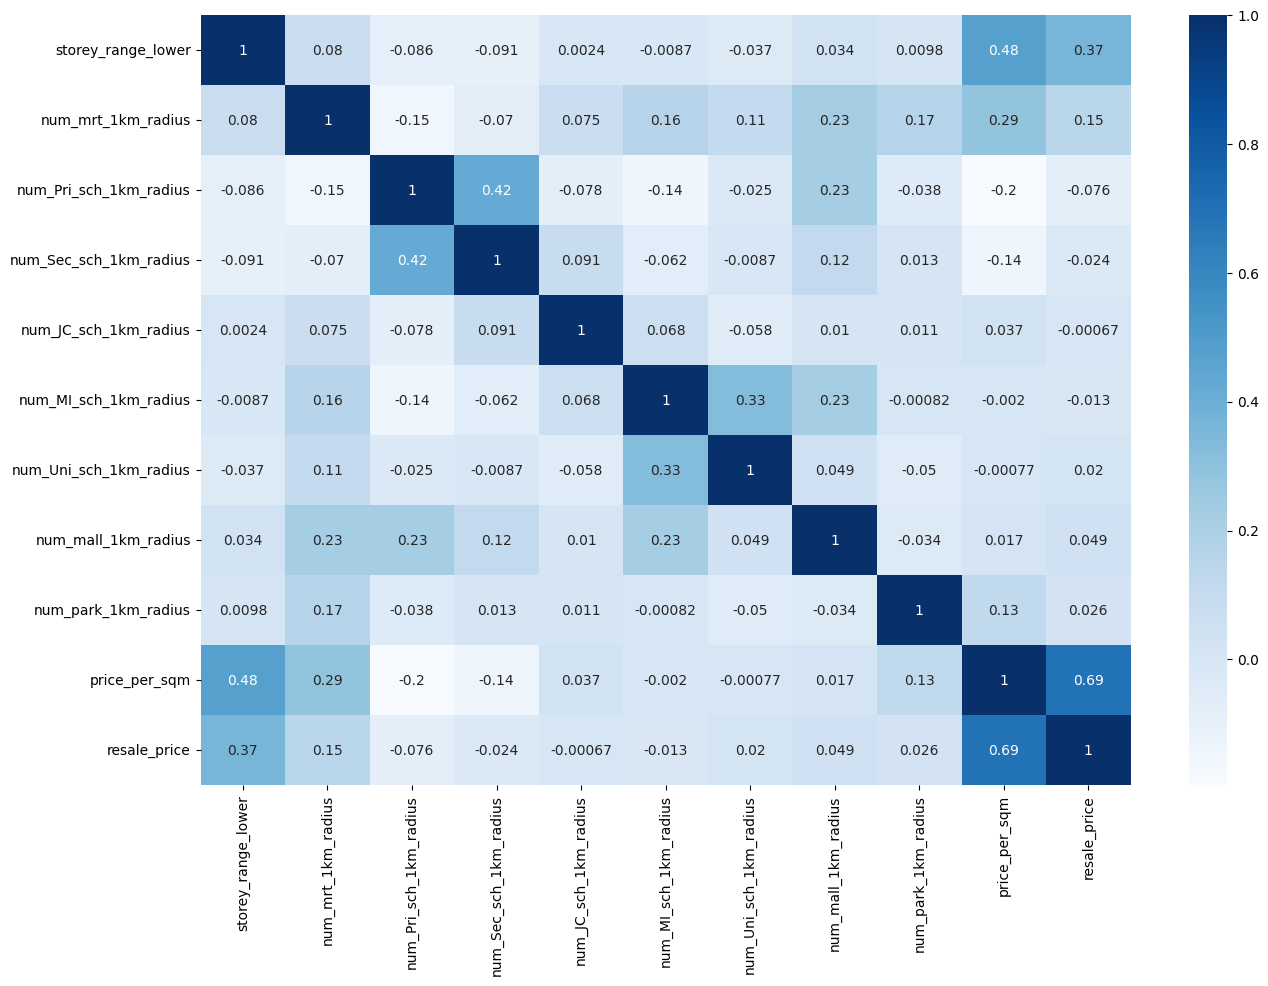

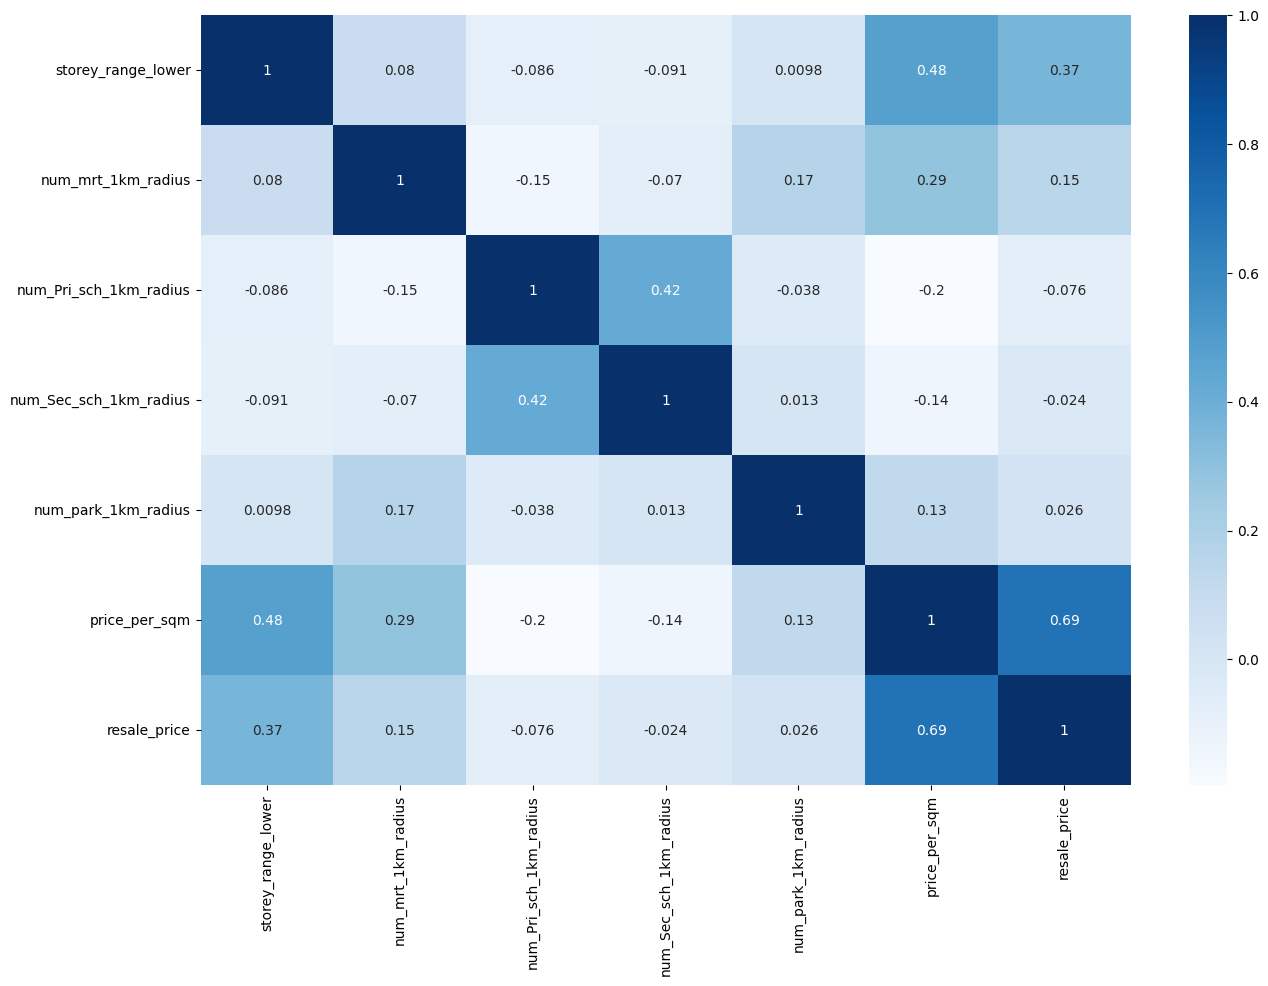

In [8]:
cat_to_cont_cols = [
    'storey_range_lower', 
    'num_mrt_1km_radius', 
    'num_Pri_sch_1km_radius', 
    'num_Sec_sch_1km_radius',
    'num_JC_sch_1km_radius', 
    'num_MI_sch_1km_radius', 
    'num_Uni_sch_1km_radius', 
    'num_mall_1km_radius',
    'num_park_1km_radius'
]
corr_matrix = df[cat_to_cont_cols + target_variables].corr()

bool_matrix = abs(corr_matrix['price_per_sqm']) > 0.05
matrix_subset = corr_matrix.loc[bool_matrix, bool_matrix]

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap = "Blues", annot=True)
plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(matrix_subset, cmap = "Blues", annot=True)
plt.show()

cont_corr_cols_1 = matrix_subset.columns.values

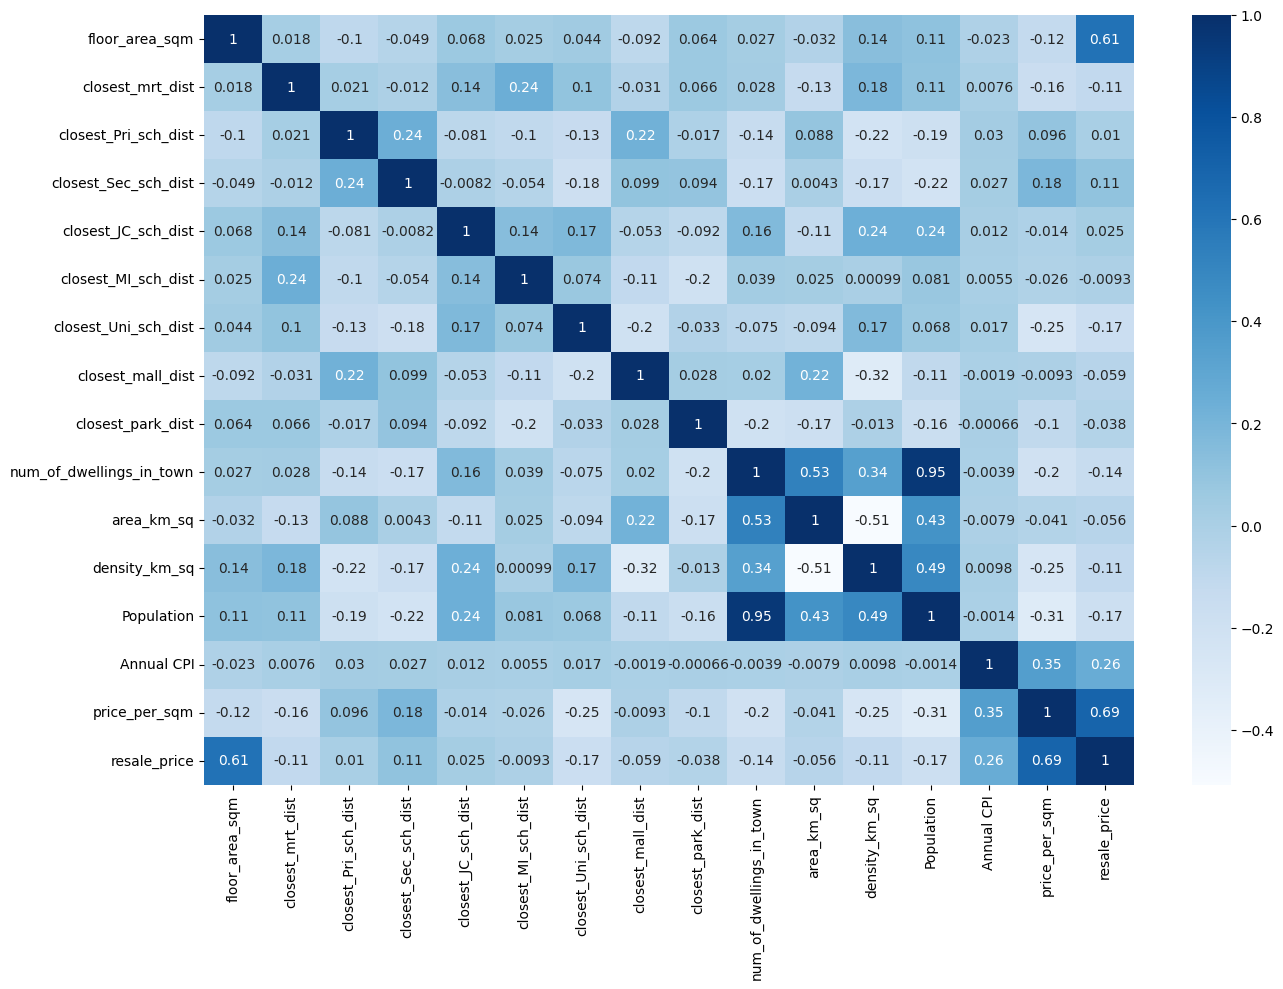

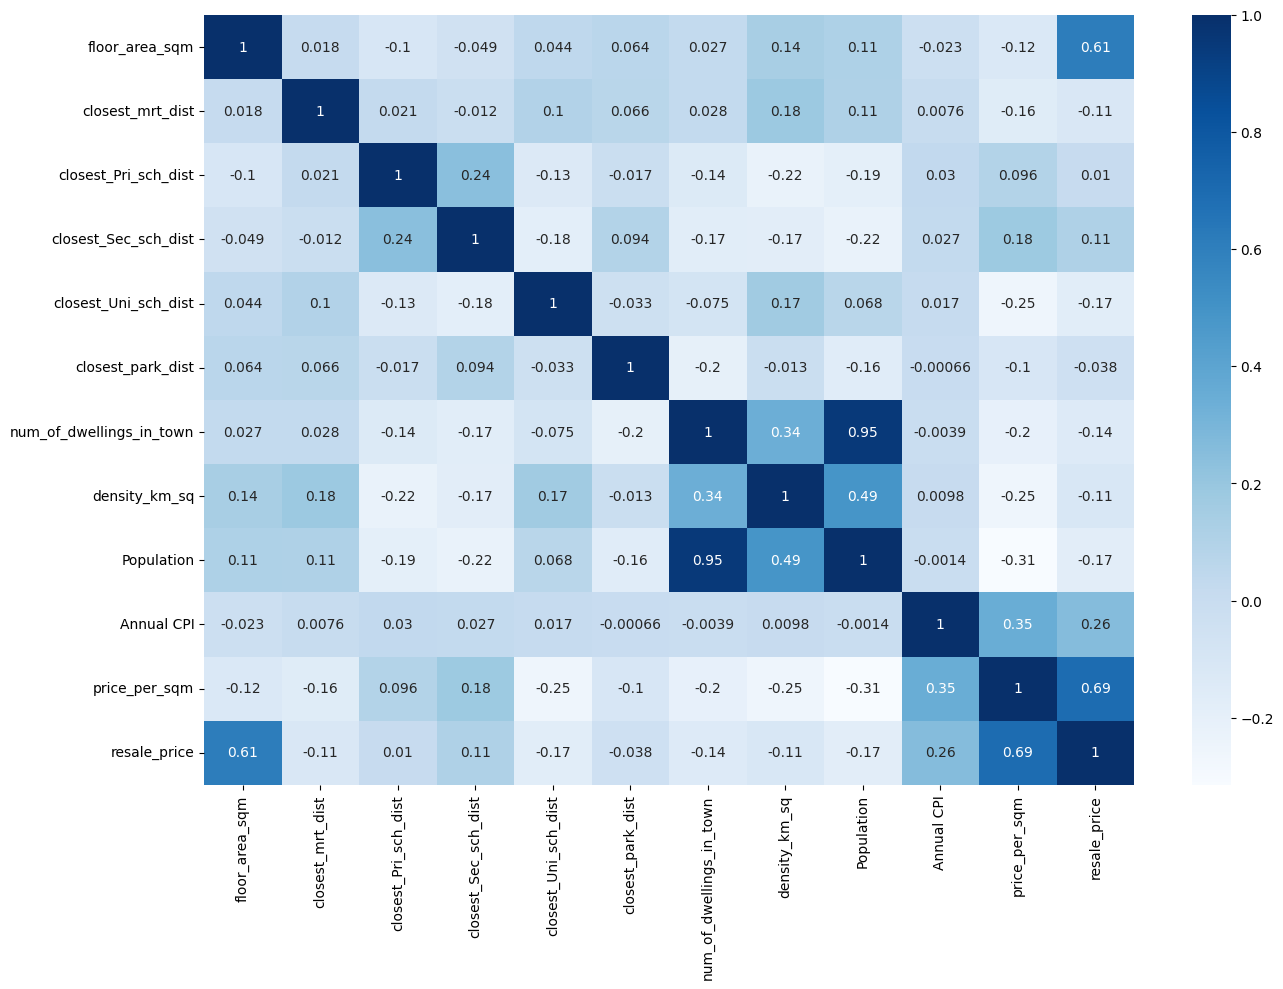

In [9]:
corr_matrix = df[numerical_variables + target_variables].corr()

bool_matrix = abs(corr_matrix['price_per_sqm']) > 0.05
matrix_subset = corr_matrix.loc[bool_matrix, bool_matrix]

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap = "Blues", annot=True)
plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(matrix_subset, cmap = "Blues", annot=True)
plt.show()

cont_corr_cols_2 = matrix_subset.columns.values

In [10]:
final_corr_cols = list(set(np.concatenate((cont_corr_cols_1, cont_corr_cols_2))))
final_corr_cols.remove('resale_price')
final_corr_cols.remove('price_per_sqm')
final_corr_cols.sort()
final_corr_cols.append('resale_price')
final_corr_cols.append('price_per_sqm')

final_corr_cols

['Annual CPI',
 'Population',
 'closest_Pri_sch_dist',
 'closest_Sec_sch_dist',
 'closest_Uni_sch_dist',
 'closest_mrt_dist',
 'closest_park_dist',
 'density_km_sq',
 'floor_area_sqm',
 'num_Pri_sch_1km_radius',
 'num_Sec_sch_1km_radius',
 'num_mrt_1km_radius',
 'num_of_dwellings_in_town',
 'num_park_1km_radius',
 'storey_range_lower',
 'resale_price',
 'price_per_sqm']

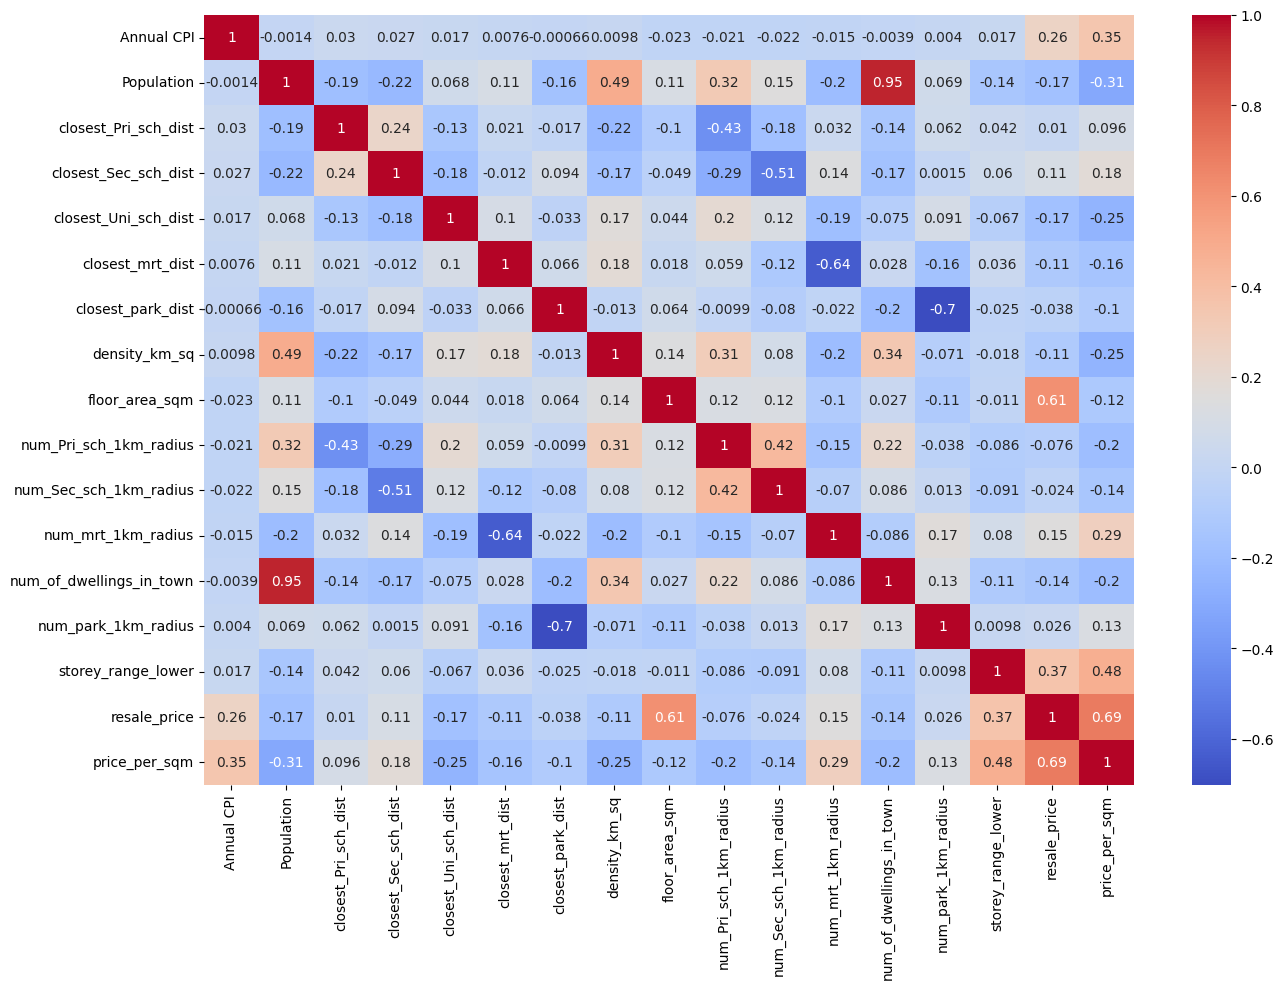

In [11]:
corr_matrix = df[final_corr_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap = "coolwarm", annot=True)
plt.show()

#### 3.2.3.2 Line plot with categorical variable breakdown for resale price

In [ ]:
# # PLOTLY WAY -> laggy, use for a few important variables
# for num_col in numerical_variables:
#     for cat_col in categorical_variables:
#         fig = px.scatter(df, x=num_col, y="resale_price", color=cat_col, opacity=0.5, title=f'Resale price by {num_col}, colored by {cat_col}')
#         fig.update_layout(
#             autosize=False,
#             width=1500,
#             height=800
#             )
#         fig.show()

In [ ]:
for num_col in numerical_variables:
    for cat_col in categorical_variables:
        plt.figure(figsize=(15,10))
        sns.scatterplot(x = df[num_col], y = df['resale_price'], hue = df[cat_col], alpha = 0.5)
        plt.title(f'Resale price by {num_col}, colored by {cat_col}')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation=90)
        plt.show()